# Perceptron Learning Algorithms

### Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from numpy import newaxis
import copy
import random
%matplotlib inline 

##### Supervised Learning 

In supervised learning, correspoding to each input, correct target output is given. Perceptron Learning Algorithm fall in this category.

{p_1, t_1}, {p_2, t_2}, ... , {p_Q, t_Q}

##### Reinforcement Learning

Instead of correct output, the network is given only a grade on its performance on inputs and corresponding outputs the network gives. 

##### Unsupervised Learning

Weights and biases are modified in response to inputs only. Generally it is used to cluster inputs.

## Perceptron

Output is given by a = hardlim (W * p + b)

For a particular neuron, decision boundary is determined by making summer output to zero i.e. W * p + b = 0. This equations partitions the space of possible inputs into two parts. If W * p + b > 1, output is 1, and 0 otherwise. Example: a line if there are 2 inputs, plane if there are 3 inputs. One can plot the graph for 2 or 3 inputs easily.

Claim: For a particular neuron, the weights vector always points in the direction where the output is 1. 
Proof: Consider ax + by = c. Also point (x_o, y_o) satisfies this. Moving in direction of (a, b), we go to (x_o + m * a, y_o + m * b) where m > 0. Putting in above equation we get ax + by = c + m(a^2 + b^2) > c. Hence Proved. 

Let error be defined as e = t - a.

W_new = W_old + e * p

b_new = b_old + e

It can be proved that the algorithms converges to the correct solution given there exists one!    

#### Transfer Functions

In [23]:
def hardlim(n):
    # w and p are vectors of length n and b is the bias
    # hardlim return 1 if sum w*p + b is greater than or equal to zero and returns 0 otherwise
    if n >= 0:
        return 1.0
    else:
        return 0.0

def hardlims(n):
    # w and p are vectors of length n and b is the bias
    # hardlim returns 1 if sum w*p + b is greater than or equal to zero and returns -1 otherwise
    if n >= 0:
        return 1.0
    else:
        return -1.0   

def purelin(n):
    # w and p are vectors of length n and b is the bias
    # purelin simply return the sum w*p + bias
    return n*1.0

def satlin(n):
    # w and p are vectors of length n and b is the bias
    # satlin returns 0 if sum w*p + b is less than zero, returns sum itself if sum is less than or equal to one
    # and 1 is sum is greater than 1
    a = n
    if a < 0:
        return 0.0
    elif a <= 1:
        return a*1.0
    else: 
        return 1.0
    
def satlins(n):
    # w and p are vectors of length n and b is the bias
    # satlin returns -1 if sum w*p + b is less than -1, returns sum itself if sum is less than or equal to one
    # and 1 is sum is greater than 1
    a = n
    if a < -1:
        return -1.0
    elif a <= 1:
        return a*1.0
    else: 
        return 1.0
    
def logsig(n):
    # w and p are vectors of length n and b is the bias
    # logsig returns 1/(1+e^-sum) where sum is w*p + b
    return 1.0/(1.0 + exp(-1.0*n))

def tansig(n):
    # w and p are vectors of length n and b is the bias
    # tansig returns (e^sum - e^-sum)/(e^sum + s^-sum) where sum is w*p + b
    return (exp(n) - exp(-n))/(exp(n) + exp(-n))

def test(func):
    n = -5
    x = []
    y = []
    precision = 1000
    for i in range(0, 10*precision):
        x.append(n + 1.0*i/precision)
        y.append(func(n + 1.0*i/precision))
    plt.xlim([-5, 5])
    plt.ylim([-1.5, 1.5])
    plt.xlabel('Summer Output')
    plt.ylabel(func)
    plt.plot(x, y)
    plt.show()
    print(np.array(x))
    print(np.array(y))

#test(hardlim)
#test(hardlims)
#test(purelin)
#test(satlin)
#test(satlins)
#test(logsig)
#test(tansig)

#### Single Layer Network

In [24]:
def apply_on_1D(f, n):      # It is called 1D because it is used for 1D weight matrices.
    # f is function and n is neuron's summer output
    return f(n)

def getNeuronOuput(f, w, p, bias):
    # w and p are vectors of length n and b is the bias
    # summer returns w_1*p_1 + w_2*p_2 + ... + w_n*p_n + b
    n = w.dot(p) + bias
    return apply_on_1D(f, n[0])

f = tansig
w = np.array([0.5, 1, 1])
p = np.array([-1, -1, 1])[:, newaxis]
b = [1]

#print(getNeuronOuput(f, w, p, b))

def apply_on_2D(f, n):           # It is called 2D because it is used for 2D weight matrices.
    # f is an numpy array of functions and n is numpy array of neurons' outputs in layer.
    output = n.copy()
    S = len(f)
    for i in range(S):
        output[i] = f[i](n[i])
    return output

# print(apply_on_2D(np.array([logsig, tansig]), np.array([2.0, 0.3])))

def getSingleLayerOutput(f, W, p, b):
    # S is the number of neurons in the layer, R is the number of inputs from previous layer. 
    # funcs or f is the function matrix (Sx1), W is the weight matrix (SxR), inputs or p is the input matrix,
    # biasses or b is the bias matrix.
    # getLayerOuput returns the result (matrix a) obtained by operating functions from funtions matrix 
    # on weights times inputs plus bias. 
    # a = f(n), n = W*p + b, return a. OR n[i] = f[i](W[i]*p + b[i])
    n = W.dot(p) + b
    return apply_on_2D(f.ravel(), n.ravel())[:, newaxis]
     
# f = np.array([logsig, hardlim])[:, newaxis]
# W = np.array([[1, 3, 4], [6, 2, 1]])
# p = np.array([1, 2, 3])[:, newaxis]
# b = np.array([1, 2])[:, newaxis]
# print(getLayerOutput(f, W, p, b))

### Class for Single Layer Network

In [25]:
class SinglelayeredNetwork(object):
    # Class contains the following variables:
    # functions - functions[i] is the transfer function of ith neuron
    # weights - weights[i][j] is jth weight for ith neuron.
    # biases - biases[i] is the bias of ith neuron.
    
    def __init__(self, functions, weights, biases):
        self.functions = np.array(functions)
        self.weights = np.array(weights)
        self.biases = np.array(biases)
        return
    
    def getNumOfNeurons(self):
        # returns the number of neurons in ith layer
        return len(self.weights)
    
    def getInputSize(self):
        # returns the size of input in network to ith layer
        return len(self.weights[0])
    
    def getFunctions(self):
        return self.functions
    
    def getWeights(self):
        return self.weights
   
    def getBiases(self):
        return self.biases
       
    def getSingleLayerNetworkOutput(self, inputToNet):
        return getSingleLayerOutput(self.functions, self.weights, inputToNet, self.biases)
    
# functions = np.array([logsig]*4)[:, newaxis]
# weights = np.array([[1.5, -1.5, 1], 
#                     [1.1, 3, 2.0], 
#                     [-1.1, -2.3, 4], 
#                     [2.1, 1, 2.3]]) 
# biases = np.array([1, -2, 3, -4])[:, newaxis]
# p = np.array([1, 2, 3])[:, newaxis]

# singleLayerTest = SinglelayeredNetwork(functions, weights, biases)
# print(singleLayerTest.getWeights())
# print(singleLayerTest.getSingleLayerNetworkOutput(p))

## Perceptron Learning Algorithm

### Generating a Random Dataset and Classification

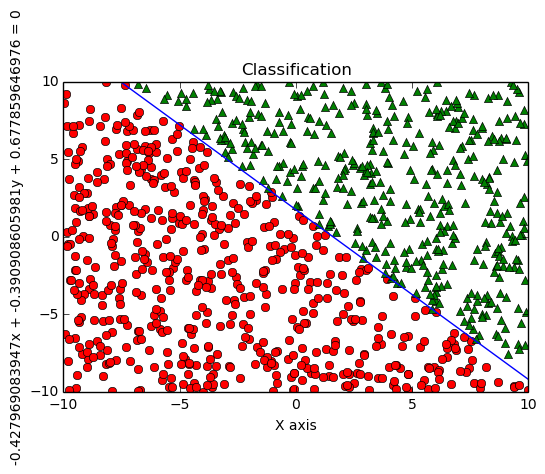

In [26]:
# We are generating a random sample with n elements with maximum and minimum values 

numOfPoints = 1000
maximum = 10.0
minimum = -10.0
dataset = []
ZeroXs = []
ZeroYs = []
OneXs = []
OneYs = []
classification = (random.random()*2-1, random.random()*2-1, random.random()*2-1)

for i in range (0, numOfPoints):
    number1 = random.uniform(minimum, maximum)
    number2 = random.uniform(minimum, maximum)
    classType = 0.0
    if number1 * classification[0] + number2 * classification[1] + 1.0 * classification[2] > 0:
        classType = 1.0
    dataset.append([[number1, number2], [classType]])
    if classType == 0.0:
        ZeroXs.append(number1)
        ZeroYs.append(number2)
    elif classType == 1.0:
        OneXs.append(number1)
        OneYs.append(number2)

x = np.linspace(minimum, maximum, 10000)
y = []
for xvalue in x:
    y.append((-1.0*classification[2]-classification[0]*xvalue)/classification[1])
plt.xlim([minimum, maximum])
plt.ylim([minimum, maximum])
plt.title("Classification")
plt.xlabel("X axis")
plt.ylabel(str(classification[0]) + "x + " + str(classification[1]) 
           + "y + " + str(classification[2]) + " = 0")
plt.plot(OneXs, OneYs, 'ro', ZeroXs, ZeroYs, 'g^')
plt.plot(x, y)
plt.show()

### Plotting a Line

In [27]:
def plot(tupleABC, title):
    givenX = np.linspace(minimum, maximum, 10000)
    givenY = []
    for xvalue in givenX:
        givenY.append((-1.0*tupleABC[2]-tupleABC[0]*xvalue)/tupleABC[1])
    plt.xlim([minimum, maximum])
    plt.ylim([minimum, maximum])
    plt.title(title)
    plt.xlabel("X axis")
    plt.ylabel(str(tupleABC[0]) + "x + " + str(tupleABC[1]) 
               + "y + " + str(tupleABC[2]) + " = 0")
    plt.plot(OneXs, OneYs, 'ro', ZeroXs, ZeroYs, 'g^')
    #plt.plot(x, y)
    plt.plot(givenX, givenY)
    plt.show()
    #print(np.array(x))
    #print(np.array(y))
    return

# for i in range(10):
#     plot((random.random()*2-1, random.random()*2-1, random.random()*2-1), "Random Input")

def plotError(tupleABC, pX, pY, title):
    givenX = np.linspace(minimum, maximum, 10000)
    givenY = []
    for xvalue in givenX:
        givenY.append((-1.0*tupleABC[2]-tupleABC[0]*xvalue)/tupleABC[1])
    plt.xlim([minimum, maximum])
    plt.ylim([minimum, maximum])
    plt.title(title)
    plt.xlabel("X axis")
    plt.ylabel(str(tupleABC[0]) + "x + " + str(tupleABC[1]) 
               + "y + " + str(tupleABC[2]) + " = 0")
    plt.plot(OneXs, OneYs, 'ro', ZeroXs, ZeroYs, 'g^')
    #plt.plot(x, y)
    plt.plot(givenX, givenY)
    plt.plot([pX], [pY], 'yo')
    plt.show()
    #print(np.array(x))
    #print(np.array(y))
    return

# for i in range(10):
#     plot((random.random()*2-1, random.random()*2-1, random.random()*2-1), "Random Input")

### Learning Algorithm

In [28]:
def learn(self, inputToNet, target):
    # inputTonet is the input numpy matrix of size Rx1 
    # target is the target output matrix of size Sx1
    error = target - self.getSingleLayerNetworkOutput(inputToNet)
    randNum = random.random()
    if error[0][0] != 0 and randNum < 1/numOfPoints:
        print(randNum)
        plotError((self.getWeights()[0][0], 
              self.getWeights()[0][1], 
              self.getBiases()[0][0]),
             inputToNet[0][0], inputToNet[1][0],
             "Initial Condition")
#     print("Target is...")
#     print(target)
#     print("Output is...")
#     print(self.getSingleLayerNetworkOutput(inputToNet))
#     print("Error is...")
#     print(error)
    
    self.weights = self.weights + error.dot(inputToNet.transpose())
    self.biases = self.biases + error
#     print("Change in weights is...")
#     print(error.dot(inputToNet.transpose()))
#     print("Change in bias is...")
#     print(error)
    
#     print("Weights are now...")
#     print(self.weights)
#     print("Biases are now...")
#     print(self.biases)
    
    if abs(error[0][0]) < 0.001:
        return True
    else:
        return False

SinglelayeredNetwork.learn = learn

### Test 1

Classification is...
(-0.4279690839467034, -0.39090860598052, 0.6778596469764324)


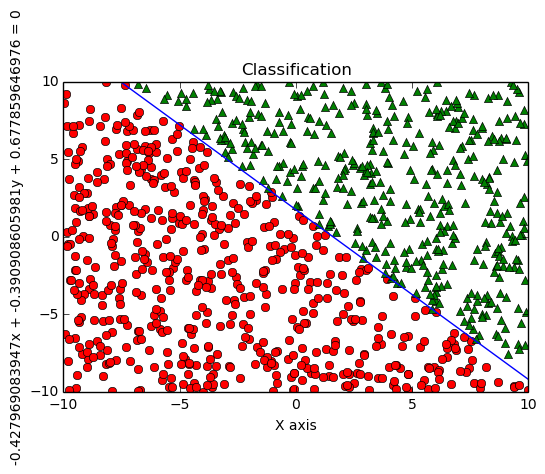

Initial classification is...
(-1.0, 1.0948059914752304, 0.0)


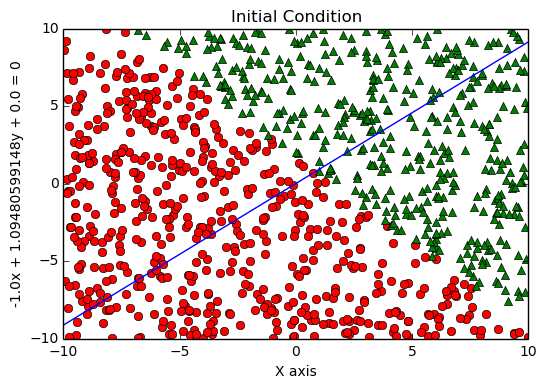

Initially, on 481 out of 1000 data points the network gives wrong output.
Final classification is...
(-45.830552087353304, -41.484153651078699, 74.0)
Ratios are...
(107.0884645795133, 106.12238517242048, 109.16714150204136)
It took 11 number of interations to get to right output.


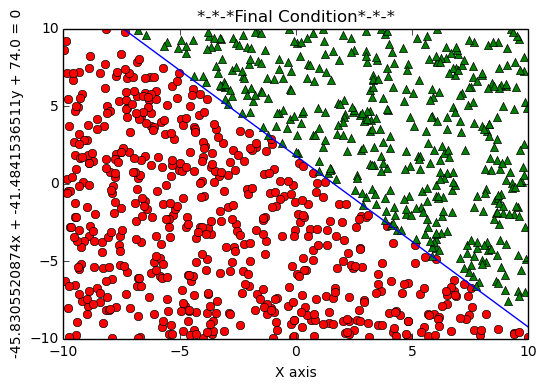

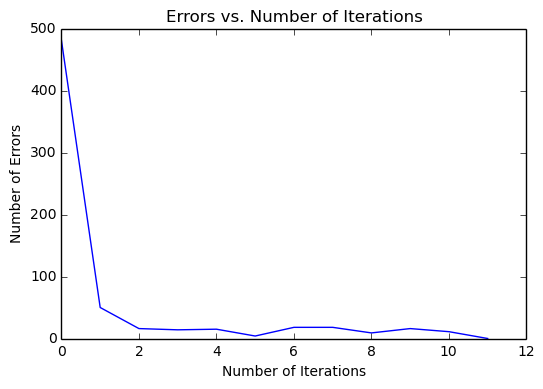

Number of errors after each iteration were...
[481, 50, 16, 14, 15, 4, 18, 18, 9, 16, 11, 0]


In [29]:
# TEST

print("Classification is...")
print(classification)
plot(classification, "Classification")

functions = np.array([hardlim]*1)[:, newaxis]
weights = np.array([[-1, classification[0]/classification[1]]])  # perpendicular to classification direction 
biases = np.array([[0.0]])

singleLayerNetworkTest = SinglelayeredNetwork(functions, weights, biases)

targetBoolMatrix = []
for data in dataset:
    targetBoolMatrix.append(data[1][0])
    # print(data[1][0])

initA = singleLayerNetworkTest.getWeights()[0][0]
initB = singleLayerNetworkTest.getWeights()[0][1]
initC = singleLayerNetworkTest.getBiases()[0][0]
        
print("Initial classification is...")
print((initA, initB, initC))

plot((singleLayerNetworkTest.getWeights()[0][0], 
      singleLayerNetworkTest.getWeights()[0][1], 
      singleLayerNetworkTest.getBiases()[0][0]),
    "Initial Condition")

# for data in dataset:
#     inputToNet = np.array(data[0])[:, newaxis]
#     print(singleLayerNetworkTest.getSingleLayerNetworkOutput(inputToNet))

errors = []

finalBoolMatrix = []
for data in dataset:
    inputToNet = np.array(data[0])[:, newaxis]
    finalBoolMatrix.append(singleLayerNetworkTest.getSingleLayerNetworkOutput(inputToNet)[0][0])
    
# print("Target Boolean Matrix is...")
# print(np.array(targetBoolMatrix))
# print("Initial Output Bool Matrix is...")
# print(np.array(finalBoolMatrix))

wrong = int(((np.array(targetBoolMatrix)-np.array(finalBoolMatrix))**2).sum())
print("Initially, on " + str(wrong) + " out of " + str(len(dataset)) 
      + " data points the network gives wrong output.")
errors.append(wrong)

numOfInterations = 0

while wrong > 0:
    numOfInterations += 1
    for data in dataset:
        # print(data)
        inputToNet = np.array(data[0])[:, newaxis]
        target = np.array(data[1])[:, newaxis]
        learningValue = singleLayerNetworkTest.learn(inputToNet, target)
    finalBoolMatrix = []
    for data in dataset:
        inputToNet = np.array(data[0])[:, newaxis]
        finalBoolMatrix.append(singleLayerNetworkTest.getSingleLayerNetworkOutput(inputToNet)[0][0])
    wrong = ((np.array(targetBoolMatrix)-np.array(finalBoolMatrix))**2).sum()
    errors.append(int(wrong))
        
finalA = singleLayerNetworkTest.getWeights()[0][0]
finalB = singleLayerNetworkTest.getWeights()[0][1]
finalC = singleLayerNetworkTest.getBiases()[0][0]        

print("Final classification is...")
print((finalA, finalB, finalC))
print("Ratios are...")
print((finalA/classification[0], finalB/classification[1], finalC/classification[2]))
print("It took " + str(numOfInterations) + " number of interations to get to right output.")

plot((singleLayerNetworkTest.getWeights()[0][0], 
      singleLayerNetworkTest.getWeights()[0][1], 
      singleLayerNetworkTest.getBiases()[0][0]),
    "*-*-*Final Condition*-*-*")

# for data in dataset:
#     inputToNet = np.array(data[0])[:, newaxis]
#     print(singleLayerNetworkTest.getSingleLayerNetworkOutput(inputToNet))[0][0]

# SEE HOW FAST THE ERRORS WERE REDUCED...
plt.xlabel("Number of Iterations")
plt.ylabel("Number of Errors")
plt.title("Errors vs. Number of Iterations")
plt.plot(np.arange(len(errors)), np.array(errors))
plt.show()
print("Number of errors after each iteration were...")
print(errors)

### Instability Test

Clearly there are a lot of fluctuations in initial interations, but as number of interations increasse, the stability increases. One way to measure instability is to take the maximum of error after that iterations.

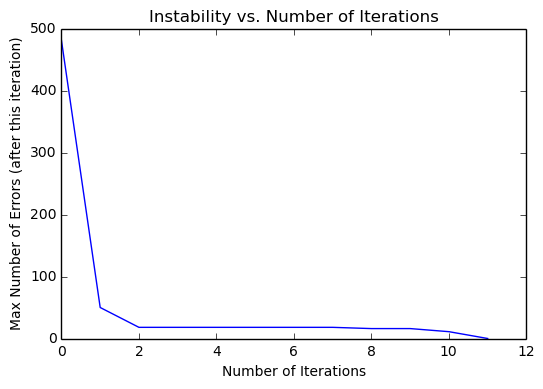

In [30]:
instability = []
for i in range(len(errors)):
    instability.append(np.array(errors[i:]).max())
plt.xlabel("Number of Iterations")
plt.ylabel("Max Number of Errors (after this iteration)")
plt.title("Instability vs. Number of Iterations")
plt.plot(np.arange(len(instability)), np.array(instability))
plt.show()

# Seems like there is exponentially decreasing instability.

# Numpy Practice

Tutorial: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
    
Reference: https://docs.scipy.org/doc/numpy-dev/reference/index.html#reference

### Basics Attributes

In [31]:
import numpy as np
a = np.arange(30).reshape(2, 3, 5)
print(a)             # prints a
print(a.shape)       # prints dimensions of a 
print(a.ndim)        # prints number of dimensions of a 
print(a.dtype.name)  # prints type of data stored in a
print(a.itemsize)    # prints the size each item in bytes
print(a.size)        # prints the number of total elements in a
print(type(a))       

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]
(2, 3, 5)
3
int64
8
30
<type 'numpy.ndarray'>


### Array Creation

In [32]:
arr = [1, 2, 3, 4, 5, 6]
a = np.array(arr)
print(a)
print(a.dtype)
arr[3] = arr[3] * 1.0
a = np.array(arr)
print(arr)
print(a)
print(a.dtype)

[1 2 3 4 5 6]
int64
[1, 2, 3, 4.0, 5, 6]
[ 1.  2.  3.  4.  5.  6.]
float64


In [33]:
np.array(1, 2, 3, 4)         # WRONG WAY

ValueError: only 2 non-keyword arguments accepted

In [34]:
b = np.array([[1, 2, 3], [4, 5, 6, 7]])
print(b)
print(b[1][3])

[[1, 2, 3] [4, 5, 6, 7]]
7


In [35]:
c = np.array([1, 2, 3], dtype = complex)
print(c)
print(c.dtype)

[ 1.+0.j  2.+0.j  3.+0.j]
complex128


In [36]:
print(np.zeros((2, 3, 2)))
print("\n")
print(np.ones((3, 4)))
print("\n")
print(np.empty((2, 2)))

[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


[[   0.            0.        ]
 [ 543.78125     389.44444444]]


In [37]:
print(np.arange(10))
print(np.arange(10, 20))
print(np.arange(10, 20, 2))

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[10 12 14 16 18]


In [38]:
from numpy import pi
print(np.linspace(0, 2, 9))           # nine numbers from 0 to 2
x = np.linspace(0, 2*pi, 10)         # to evaluate a function on lots of points
print(x)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.  ]
[ 0.          0.6981317   1.3962634   2.0943951   2.7925268   3.4906585
  4.1887902   4.88692191  5.58505361  6.28318531]


In [39]:
f = np.sin(x)
print(f)

[  0.00000000e+00   6.42787610e-01   9.84807753e-01   8.66025404e-01
   3.42020143e-01  -3.42020143e-01  -8.66025404e-01  -9.84807753e-01
  -6.42787610e-01  -2.44929360e-16]


### Printing Array

In [40]:
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [41]:
b = np.arange(12).reshape(3, 4)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [42]:
c = np.arange(24).reshape(2, 3, 4)
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [43]:
print(np.arange(10000))

[   0    1    2 ..., 9997 9998 9999]


In [44]:
print(np.arange(10000).reshape(100,100))

[[   0    1    2 ...,   97   98   99]
 [ 100  101  102 ...,  197  198  199]
 [ 200  201  202 ...,  297  298  299]
 ..., 
 [9700 9701 9702 ..., 9797 9798 9799]
 [9800 9801 9802 ..., 9897 9898 9899]
 [9900 9901 9902 ..., 9997 9998 9999]]


### Basic Operations

In [45]:
a = np.array([20.0]*5)
print(a)
b = np.arange(5)
print(b)

c = a - b
print(c)

c = a + b
print(c)

c = a * b
print(c)

c = b / a
print(c)

[ 20.  20.  20.  20.  20.]
[0 1 2 3 4]
[ 20.  19.  18.  17.  16.]
[ 20.  21.  22.  23.  24.]
[  0.  20.  40.  60.  80.]
[ 0.    0.05  0.1   0.15  0.2 ]


[  0.00000000e+00   6.28381369e-04   1.25676274e-03 ...,   6.28192854e+00
   6.28255693e+00   6.28318531e+00]


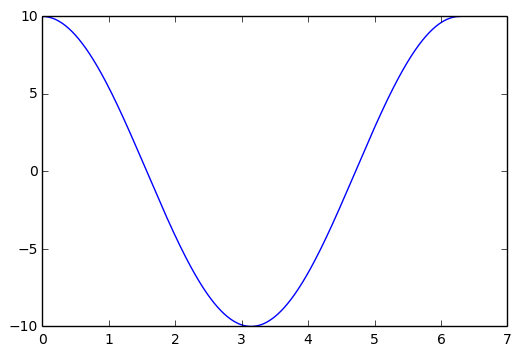

In [46]:
import matplotlib.pyplot as plt
a = np.linspace(0, 2*pi, 10000)
f = 10 * np.cos(a)                       # TRIGONOMETRIC FUNCTIONS
print(a)
plt.plot(a, f)
plt.show()

In [47]:
A = np.arange(6).reshape(2, 3)
print(A)
B = np.arange(6).reshape(3, 2)
print(B)
print(A.dot(B))                          # MATRIX MULTIPLICATION
print(np.dot(A, B))                      # MATRIX MULTIPLICATION 

[[0 1 2]
 [3 4 5]]
[[0 1]
 [2 3]
 [4 5]]
[[10 13]
 [28 40]]
[[10 13]
 [28 40]]


In [48]:
C = np.arange(10).reshape(2, 5)
print(C)
C *= 3
print(C)

D = np.ones((2, 5), dtype = int)
print(D)
D += 3
print(D)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0  3  6  9 12]
 [15 18 21 24 27]]
[[1 1 1 1 1]
 [1 1 1 1 1]]
[[4 4 4 4 4]
 [4 4 4 4 4]]


In [49]:
R = np.random.random((2, 3))            # RANDOM ARRAY
print(R)
Q = np.arange(6).reshape(2, 3)
print(Q)

R += Q                                  # CREATES NO ERROR SINCE INT -> FLOAT IS OKAY (UPCASTING)
print(R) 

Q += R                                  # GIVES AN ERROR SINCE FLOAT IS STRONGER TYPE
print(Q)

[[ 0.35537049  0.06798497  0.23186565]
 [ 0.92129601  0.10343985  0.55764777]]
[[0 1 2]
 [3 4 5]]
[[ 0.35537049  1.06798497  2.23186565]
 [ 3.92129601  4.10343985  5.55764777]]


TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [50]:
R = np.random.random((5, 5))
print(R)
R = 20 * R - 10
print(R)

[[ 0.83938621  0.11976537  0.08581618  0.99687841  0.20989312]
 [ 0.91007475  0.52349872  0.40015965  0.66789356  0.79475193]
 [ 0.82047835  0.82018511  0.90478428  0.14770065  0.49039146]
 [ 0.82396876  0.10339428  0.94430692  0.55144608  0.58235149]
 [ 0.72059373  0.56942821  0.29698376  0.79395738  0.61973167]]
[[ 6.78772412 -7.60469255 -8.28367633  9.93756827 -5.80213759]
 [ 8.20149506  0.46997443 -1.99680694  3.35787125  5.89503853]
 [ 6.40956704  6.40370217  8.09568554 -7.0459869  -0.1921708 ]
 [ 6.47937511 -7.93211432  8.88613831  1.02892157  1.6470299 ]
 [ 4.41187453  1.38856423 -4.06032471  5.8791475   2.39463337]]


In [51]:
R = np.ones((2, 2))
Q = np.exp(R * pi * 1j)
print(R)
print(R.dtype)
print(Q)
print(Q.dtype)

[[ 1.  1.]
 [ 1.  1.]]
float64
[[-1. +1.22464680e-16j -1. +1.22464680e-16j]
 [-1. +1.22464680e-16j -1. +1.22464680e-16j]]
complex128


In [52]:
a = np.random.random((1000, 1000))
print(a)
print(a.sum()/500000)                            # SUM OPERATION
print(a.min() + a.max())                         # MIN AND MAX OPERATION

[[ 0.16450221  0.82818708  0.2089108  ...,  0.83795668  0.95785385
   0.43931779]
 [ 0.95877386  0.99320526  0.90147102 ...,  0.63220604  0.64982998
   0.1661338 ]
 [ 0.96699749  0.25136034  0.1832742  ...,  0.32356734  0.24976426
   0.80094005]
 ..., 
 [ 0.19298133  0.52502204  0.39940689 ...,  0.33951688  0.27686329
   0.60694259]
 [ 0.12521728  0.55396072  0.7423722  ...,  0.10359529  0.52240371
   0.63740205]
 [ 0.00720731  0.07214224  0.82331215 ...,  0.88029919  0.72090199
   0.05099883]]
1.00025093435
1.00000157638


In [53]:
b = np.arange(12).reshape(3, 4)
print(b)
print(b.sum(axis = 0))
print(b.min(axis = 1))
print(b.max(axis = 0))
print(b.cumsum(axis = 1))                                # CUMULATIVE SUM OF ROWS

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[0 4 8]
[ 8  9 10 11]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


### Universal Functions

In [54]:
C = np.arange(4.0).reshape(2, 2)
C *= pi / 2
print(C)
print(np.exp(C * 1j))                       # EXPONENTIAL
print(np.sin(C))                            # SINE
print(np.cos(C))                            # COSINE
print(np.tan(C))                            # TANGENT

[[ 0.          1.57079633]
 [ 3.14159265  4.71238898]]
[[  1.00000000e+00 +0.00000000e+00j   6.12323400e-17 +1.00000000e+00j]
 [ -1.00000000e+00 +1.22464680e-16j  -1.83697020e-16 -1.00000000e+00j]]
[[  0.00000000e+00   1.00000000e+00]
 [  1.22464680e-16  -1.00000000e+00]]
[[  1.00000000e+00   6.12323400e-17]
 [ -1.00000000e+00  -1.83697020e-16]]
[[  0.00000000e+00   1.63312394e+16]
 [ -1.22464680e-16   5.44374645e+15]]


In [55]:
D = 20 * np.random.random((2, 5)) - 10
print(D)
print(np.floor(D))                          # FLOOR
print(np.ceil(D))                           # CEILING

[[-4.19645435 -4.17584067  2.40296943 -1.51460064  0.44404428]
 [-8.05233592  3.08453593  7.94138967  0.93682331 -9.6585928 ]]
[[ -5.  -5.   2.  -2.   0.]
 [ -9.   3.   7.   0. -10.]]
[[-4. -4.  3. -1.  1.]
 [-8.  4.  8.  1. -9.]]


### Slicing

In [56]:
C = np.arange(4).reshape(2, 2)
print(C)
C = C**3
print(C)

c = C[1][0:1]                           # SLICING OF ARRAYS
print(c)
c = C[1:2]                              # SLICING OF ARRAYS
print(c)

[[0 1]
 [2 3]]
[[ 0  1]
 [ 8 27]]
[8]
[[ 8 27]]


### Indexing

In [57]:
def f(x,y):                             # function can decide element at index (x, y)
    return x + y

b = np.fromfunction(f, (5, 4), dtype = int)
print(b)

print(b[2, 3])                          
print(b[2][3])
print(b[0:5, 2])                        # each row in the third column of b
print(b[ : , 2])
print(b[ :2, :])                        # each column in the first and second row of b

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]]
5
5
[2 3 4 5 6]
[2 3 4 5 6]
[[0 1 2 3]
 [1 2 3 4]]


In [58]:
# "..." indicates to consider full length
b = np.arange(16).reshape(2, 2, 2, 2)
print(b)
print("-------------")
print(b[:, 1, :, 1])
print("-------------")
print(b[..., 1])
print("-------------")
print(b[:, 1, ...])

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]
-------------
[[ 5  7]
 [13 15]]
-------------
[[[ 1  3]
  [ 5  7]]

 [[ 9 11]
  [13 15]]]
-------------
[[[ 4  5]
  [ 6  7]]

 [[12 13]
  [14 15]]]


### Iterating

In [59]:
b = np.arange(10).reshape(5, 2)
for row in b:
    print(row)
    for col in row:
        print col

[0 1]
0
1
[2 3]
2
3
[4 5]
4
5
[6 7]
6
7
[8 9]
8
9


### Reshaping Array

In [60]:
b = np.arange(16).reshape(4, 4)
print(b)
print("-------------")

b = b.ravel()                          # FLATTEN THE ARRAY
print(b)
print("-------------")

b.shape = (2, 8)                       # ASSIGNING THE SHAPE
print(b)
print("-------------")

b.resize(4, 4)                         # RESIZE THE ARRAY
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
-------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
-------------
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]
-------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


### Stacking Arrays

In [61]:
a = np.array([[1, 2], [2, 1]])
print(a)
b = a*2 - 4
print(b)

print(np.vstack((a, b)))                 # VERTICAL STACKING
print(np.hstack((a, b)))                 # HORIZONTAL STACKING

[[1 2]
 [2 1]]
[[-2  0]
 [ 0 -2]]
[[ 1  2]
 [ 2  1]
 [-2  0]
 [ 0 -2]]
[[ 1  2 -2  0]
 [ 2  1  0 -2]]


In [62]:
from numpy import newaxis
a = np.arange(5)
print(a)
print("--------------")
b = a[:, newaxis]             # USED TO CREATE "COLUMN VECTORS" FROM ROW VECTORS
print(b)
print("--------------")
c = np.zeros(5)
print(c)
print("--------------")
d = np.column_stack((a[:, newaxis], c[:, newaxis]))
print(d)
print("--------------")
d = np.hstack((a[:, newaxis], c[:, newaxis]))
print(d)

[0 1 2 3 4]
--------------
[[0]
 [1]
 [2]
 [3]
 [4]]
--------------
[ 0.  0.  0.  0.  0.]
--------------
[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 3.  0.]
 [ 4.  0.]]
--------------
[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 3.  0.]
 [ 4.  0.]]


### Splitting Arrays

In [63]:
a = np.floor(10 * np.random.random((2, 12)))
print(a)
print("--------------")
print(np.hsplit(a, 3)[0])                      # HORIZONTAL SPLIT
print("--------------")
print(np.hsplit(a, 3)[1])
print("--------------")
print(np.hsplit(a, 3)[2])

[[ 7.  6.  8.  8.  6.  9.  7.  4.  4.  3.  1.  7.]
 [ 4.  9.  5.  8.  7.  3.  7.  4.  0.  4.  5.  0.]]
--------------
[[ 7.  6.  8.  8.]
 [ 4.  9.  5.  8.]]
--------------
[[ 6.  9.  7.  4.]
 [ 7.  3.  7.  4.]]
--------------
[[ 4.  3.  1.  7.]
 [ 0.  4.  5.  0.]]


In [64]:
a = np.floor(10 * np.random.random((8, 3)))
print(a)
print("--------------")
print(np.vsplit(a, (3, 4, 7))[0])                      # VERTICALLY SPLIT
print("--------------")
print(np.vsplit(a, (3, 4, 7))[1])                      # ON PARTICULAR POSITIONS
print("--------------")
print(np.vsplit(a, (3, 4, 7))[2])                      # VERTICALLY
print("--------------")
print(np.vsplit(a, (3, 4, 7))[3])

[[ 5.  2.  2.]
 [ 9.  8.  5.]
 [ 6.  3.  1.]
 [ 1.  2.  4.]
 [ 6.  7.  5.]
 [ 1.  4.  6.]
 [ 4.  7.  0.]
 [ 0.  8.  8.]]
--------------
[[ 5.  2.  2.]
 [ 9.  8.  5.]
 [ 6.  3.  1.]]
--------------
[[ 1.  2.  4.]]
--------------
[[ 6.  7.  5.]
 [ 1.  4.  6.]
 [ 4.  7.  0.]]
--------------
[[ 0.  8.  8.]]


### Copies and Views

In [65]:
# NO COPY AT ALL
A = np.arange(6)
B = A               # B is assigned to A
B[2] = 3            # SO CHANGE IN B... 
print(A)            # ... IS REFLECTED IN A
print(id(A))
print(id(B))

[0 1 3 3 4 5]
139992919083648
139992919083648


In [66]:
def f(x):
     print(id(x))
          
f(A)
print(id(A))

139992919083648
139992919083648


In [67]:
B = A.view()
print(B is A)
print(B.base is A)
print("-------")
B = A
print(B is A)
print(B.base is A)

False
True
-------
True
False


In [68]:
# DEEP COPY
B = A.copy()
print(B is A)
print(B.base is A)

False
False


In [69]:
# numpy.ndarray.base
# It is base object if memory is from some other object.

# Examples:
# 1. The base of an array that owns its memory is None:
x = np.array([1,2,3,4])
print(x.base is None)

# 2. Slicing creates a view, whose memory is shared with x:
y = x[2:]
print(y.base is x)

True
True


In [70]:
a = np.arange(12)**2
print(a)
print("---------")
i = np.array([11, 3, 3, 4, 5, 3])
b = a[i]                          # MAKING AN ARRAY OF ELEMENTS 
print(b)                          # AT A PARTICULAR INDICES IN PARTICULAR ORDER

[  0   1   4   9  16  25  36  49  64  81 100 121]
---------
[121   9   9  16  25   9]
